# 6.5 - Unsupervised Machine Learning - Clustering

## Contents:
### 01. Import libraries and data
### 02. Data cleaning
### 03. The elbow technique
### 04. k-means clustering
### 05.

## 01. Import libraries and data

In [42]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [43]:
# Ensure graphs are displayed within the notebook without the need to "call" them specifically

%matplotlib inline

In [44]:
path = r'C:\Users\lrutl\OneDrive\Desktop\Advanced Analytics & Dashboard Design\COVID19 School ReOpening and Students'

In [45]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data','Prepared data','sf_rc_merged_v2.csv'))

## 02. Data cleaning

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5126 entries, 0 to 5125
Data columns (total 61 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               5126 non-null   int64  
 1   Week                                     5126 non-null   object 
 2   DistrictName                             5126 non-null   object 
 3   Model_Elementary                         5116 non-null   object 
 4   Model_Middle                             5101 non-null   object 
 5   Model_High                               5073 non-null   object 
 6   GradeLevels_Remote_Phasein               898 non-null    object 
 7   StudentGroups_Remote_Phasein             998 non-null    object 
 8   Other_Remote_Phasein                     248 non-null    object 
 9   Enrollment_Elementary                    5126 non-null   int64  
 10  FullTimeALE_Elementary                   5126 no

In [47]:
df.head(20)

,Unnamed: 0,Week,DistrictName,Model_Elementary,Model_Middle,Model_High,GradeLevels_Remote_Phasein,StudentGroups_Remote_Phasein,Other_Remote_Phasein,Enrollment_Elementary,...,Non-Low Income,Non Migrant,Non Military Parent,Non Mobile,Non Section 504,Students without Disabilities,Percent Low-income,Percent Non-Low Income,Percent Homeless,Percent Non-Homeless
0,0,1/18/2021,Adna School District,Typical/Traditional In-Person,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,216,...,418,591,583,572,583,527,0.29,0.71,0.01,0.99
1,1,1/25/2021,Adna School District,Typical/Traditional In-Person,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,216,...,418,591,583,572,583,527,0.29,0.71,0.01,0.99
2,2,2/1/2021,Adna School District,Typical/Traditional In-Person,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,216,...,418,591,583,572,583,527,0.29,0.71,0.01,0.99
3,3,2/22/2021,Adna School District,Partial In-Person for All Students,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,216,...,418,591,583,572,583,527,0.29,0.71,0.01,0.99
4,4,3/1/2021,Adna School District,Partial In-Person for All Students,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,216,...,418,591,583,572,583,527,0.29,0.71,0.01,0.99
5,5,3/8/2021,Adna School District,Partial In-Person for All Students,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,216,...,418,591,583,572,583,527,0.29,0.71,0.01,0.99
6,6,3/15/2021,Adna School District,Partial In-Person for All Students,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,216,...,418,591,583,572,583,527,0.29,0.71,0.01,0.99
7,7,4/12/2021,Adna School District,Partial In-Person for All Students,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,226,...,418,591,583,572,583,527,0.29,0.71,0.01,0.99
8,8,4/19/2021,Adna School District,Partial In-Person for All Students,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,226,...,418,591,583,572,583,527,0.29,0.71,0.01,0.99
9,9,4/26/2021,Adna School District,Partial In-Person for All Students,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,226,...,418,591,583,572,583,527,0.29,0.71,0.01,0.99


In [48]:
# Drop Unnamed: 0 column not needed for analysis

df = df.drop(columns = ['Unnamed: 0'])

In [60]:
# Change Week column to date format

df['Week'] = pd.to_datetime(df['Week'])

In [66]:
# Create new df using only columns for clustering

df_clustering = df.drop(columns = ['Week','DistrictName','Model_Elementary','Model_Middle','Model_High','GradeLevels_Remote_Phasein','StudentGroups_Remote_Phasein','Other_Remote_Phasein','OrganizationLevel','County'])

In [70]:
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5126 entries, 0 to 5125
Data columns (total 50 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Enrollment_Elementary                    5126 non-null   int64  
 1   FullTimeALE_Elementary                   5126 non-null   int64  
 2   OptOut_Elementary                        5126 non-null   int64  
 3   TypicalInPerson_Elementary               5126 non-null   int64  
 4   Weekly_Elementary                        5126 non-null   int64  
 5   Enrollment_Middle                        5126 non-null   int64  
 6   FullTimeALE_Middle                       5126 non-null   int64  
 7   OptOut_Middle                            5126 non-null   int64  
 8   TypicalInPerson_Middle                   5126 non-null   int64  
 9   Weekly_Middle                            5126 non-null   int64  
 10  Enrollment_High                          5126 no

In [71]:
df_clustering.head()

,Enrollment_Elementary,FullTimeALE_Elementary,OptOut_Elementary,TypicalInPerson_Elementary,Weekly_Elementary,Enrollment_Middle,FullTimeALE_Middle,OptOut_Middle,TypicalInPerson_Middle,Weekly_Middle,...,Non-Low Income,Non Migrant,Non Military Parent,Non Mobile,Non Section 504,Students without Disabilities,Percent Low-income,Percent Non-Low Income,Percent Homeless,Percent Non-Homeless
0,216,0,0,216,216,155,0,0,90,155,...,418,591,583,572,583,527,0.29,0.71,0.01,0.99
1,216,0,0,216,216,155,0,0,90,155,...,418,591,583,572,583,527,0.29,0.71,0.01,0.99
2,216,0,17,216,216,155,14,14,85,155,...,418,591,583,572,583,527,0.29,0.71,0.01,0.99
3,216,0,17,216,216,155,14,14,85,155,...,418,591,583,572,583,527,0.29,0.71,0.01,0.99
4,216,0,15,216,216,155,0,14,85,155,...,418,591,583,572,583,527,0.29,0.71,0.01,0.99


## 03. The elbow technique

In [72]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [74]:
score = [kmeans[i].fit(df_clustering).score(df_clustering) for i in range(len(kmeans))] 

score

[-2017756098784.6743,
 -539186230877.46326,
 -288660541852.50964,
 -201755870398.69186,
 -160709763431.72034,
 -132096542508.41669,
 -114238928888.56862,
 -103446140012.45952,
 -95407115567.45494]

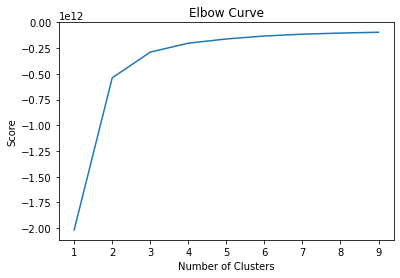

In [75]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The optimal count for clusters is 3 because the curve flattens out after 3 on the x-axis.

## 04. k-means clustering

In [76]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [77]:
# Fit the k-means object to the data.

kmeans.fit(df_clustering)

C:\Users\lrutl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [78]:
df_clustering['clusters'] = kmeans.fit_predict(df_clustering)

C:\Users\lrutl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [79]:
df_clustering.head()

,Enrollment_Elementary,FullTimeALE_Elementary,OptOut_Elementary,TypicalInPerson_Elementary,Weekly_Elementary,Enrollment_Middle,FullTimeALE_Middle,OptOut_Middle,TypicalInPerson_Middle,Weekly_Middle,...,Non Migrant,Non Military Parent,Non Mobile,Non Section 504,Students without Disabilities,Percent Low-income,Percent Non-Low Income,Percent Homeless,Percent Non-Homeless,clusters
0,216,0,0,216,216,155,0,0,90,155,...,591,583,572,583,527,0.29,0.71,0.01,0.99,0
1,216,0,0,216,216,155,0,0,90,155,...,591,583,572,583,527,0.29,0.71,0.01,0.99,0
2,216,0,17,216,216,155,14,14,85,155,...,591,583,572,583,527,0.29,0.71,0.01,0.99,0
3,216,0,17,216,216,155,14,14,85,155,...,591,583,572,583,527,0.29,0.71,0.01,0.99,0
4,216,0,15,216,216,155,0,14,85,155,...,591,583,572,583,527,0.29,0.71,0.01,0.99,0


In [80]:
df_clustering['clusters'].value_counts()

0    3910
2     795
1     421
Name: clusters, dtype: int64

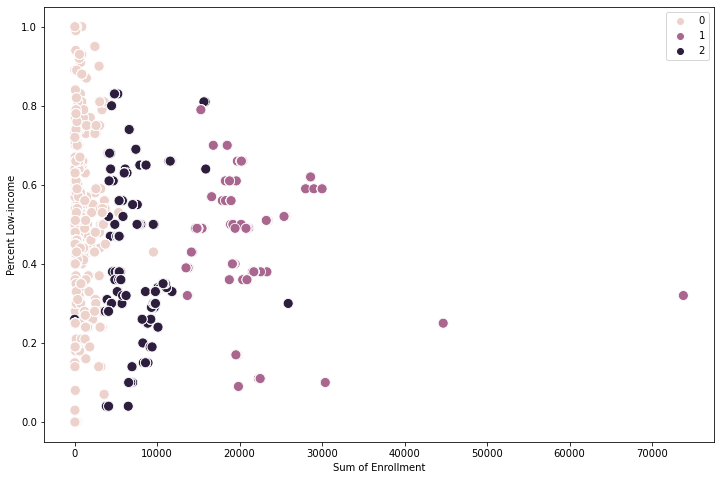

In [81]:
# Plot the clusters for the "Percent Low-income" and "Sum of Enrollment" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clustering['Sum of Enrollment'], y=df_clustering['Percent Low-income'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Sum of Enrollment') # Label x-axis.
plt.ylabel('Percent Low-income') # Label y-axis.
plt.show()

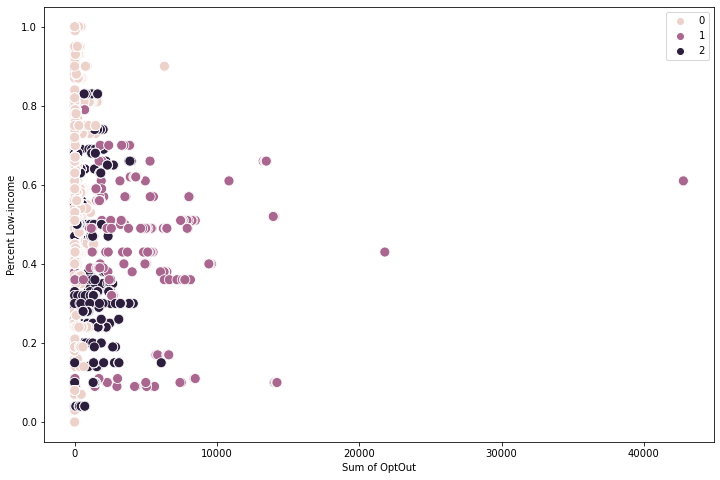

In [82]:
# Plot the clusters for the "Percent Low-income" and "Sum of OptOut" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clustering['Sum of OptOut'], y=df_clustering['Percent Low-income'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Sum of OptOut') # Label x-axis.
plt.ylabel('Percent Low-income') # Label y-axis.
plt.show()

The "Percent Low-income" and "Sum of Enrollment" variables show a stronger relationship than the "Percent Low-income" and "Sum of OptOut" variables.

In [95]:
df_clustering.loc[df_clustering['clusters'] == 2, 'clusters'] = 'dark purple'
df_clustering.loc[df_clustering['clusters'] == 1, 'clusters'] = 'purple'
df_clustering.loc[df_clustering['clusters'] == 0, 'clusters'] = 'pink'

In [97]:
df_clustering.groupby('cluster').agg({'Sum of Enrollment':['mean', 'median'], 
                         'Percent Low-income':['mean', 'median'], 
                         'Sum of OptOut':['mean', 'median'],
                          'Percent Homeless':['mean', 'median']})

Sum of Enrollment          Percent Low-income         \
                         mean   median               mean median   
cluster                                                            
dark purple       6886.396226   6136.0           0.426088   0.36   
pink               926.765217    533.5           0.523593   0.53   
purple           20309.318290  19677.0           0.446128   0.49   

            Sum of OptOut        Percent Homeless         
                     mean median             mean median  
cluster                                                   
dark purple   1065.689308    939         0.018604   0.02  
pink           127.988747     31         0.030302   0.02  
purple        3916.420428   2604         0.018385   0.02